## THE KING DECOMPOSITION

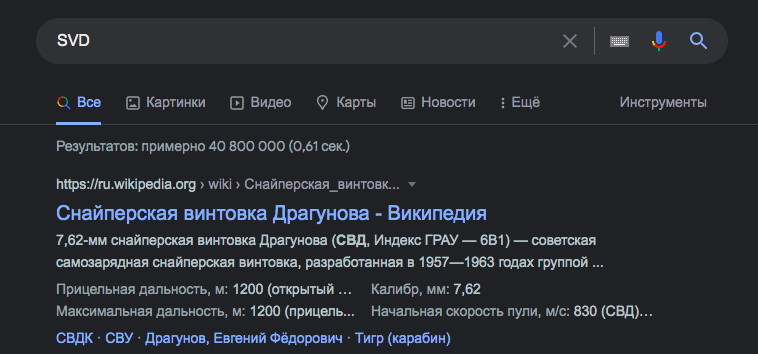

## SVD

- Any matrix can be presented in the form

$$A = U\Sigma V^*,$$

where $U$ and $V$ are unitary

$$ U^*U = I $$

and $\Sigma$ is diagonal.


## Singular value decomposition
To compute low-rank approximation, we need to compute **singular value decomposition** (SVD).

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where
- $U$ is an $n \times K$ unitary matrix,
- $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$,
- $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal.
- Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

### Proof
* Matrix $A^*A$ is Hermitian, hence diagonalizable in unitary basis (will be discussed further in the course).
* $A^*A\geq0$ (non-negative definite), so eigenvalues are non-negative.
Therefore, there exists unitary matrix $V = [v_1, \dots, v_n]$ such that

$$ V^* A^* A V = \text{diag}(\sigma_1^2,\dots, \sigma_n^2), \quad \sigma_1\geq \sigma_2\geq \dots \geq \sigma_n. $$

Let $\sigma_i = 0$ for $i>r$, where $r$ is some integer. <br>
Let $V_r= [v_1, \dots, v_r]$, $\Sigma_r = \text{diag}(\sigma_1, \dots,\sigma_r)$. Hence

$$ V^*_r A^* A V_r = \Sigma_r^2 \quad \Longrightarrow \quad (\Sigma_r^{-1} V_r^* A^*) (A V_r\Sigma_r^{-1} ) = I. $$

As a result, matrix $U_r = A V_r\Sigma_r^{-1}$ satisfies $U_r^* U_r = I$ and hence has orthogonal columns. <br>
Let us add to $U_r$ any orthogonal columns that are orthogonal to columns in $U_r$ and denote this matrix as $U$.
Then

$$ AV = U \begin{bmatrix} \Sigma_r & 0 \\ 0 & 0 \end{bmatrix}\quad \Longrightarrow \quad U^* A V = \begin{bmatrix}\Sigma_r & 0 \\ 0 & 0 \end{bmatrix}.
$$

Since multiplication by non-singular matrices does not change rank of $A$, we have $r = \text{rank}(A)$.

## AND NOW LETS CODE PCA

## AGAIN

## VIA SVD

#**PCA**

Today we going to learn and code **Principal Component analysis**

This method helps to process a data reduction. It done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order.


##**PCA Algoritm**

1) Center the data

$$
\overline{X} = X - \mu
$$

Where $\mu$ is the vector of means for every feature

## AND HERE THE CHANGE. we DONOT compute covarience matrix and its eigen decomposition. We compute SVD of $\overline{X}$ exactly

2) Compute SVD of $\overline{X}$

$$
\overline{X} = U Σ V^{⊤}
$$

Let us stop here for a while:

1)  $\overline{X}$ is a shape $n \times m$, where n is amout of products  m is amount of features. $U$ is shape $n \times k$, $\Sigma$is a shape of $k times k$ and V is ashape $m times k$

2) to get new features representations we should

$$
\overline{X}  V \sqrt{\Sigma^{-1}} == U Σ V^{⊤} V \sqrt{\Sigma^{-1}} = U \sqrt{\Sigma}
$$

In some sources you may see  such  a derivation

$$
\overline{X}  V  == U Σ V^{⊤} V = U \Sigma
$$








3) take only $k$ singular values in order to compress the data and get the new vector representations

$$
T = U[:, :k] \Sigma [:, :k]
$$



In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv"
dataset = pd.read_csv(csv_url)

# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)

classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Seafood, Serving Size (84 g/3 oz) | Fruits Serving Size (gram weight/ounce weight) | Vegetables, Serving Size (gram weight/ ounce weight)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


,Food and Serving,Calories,Calories from Fat,Total Fat 1,Total Fat 2,Sodium 1,Sodium 2,Potassium 1,Potassium 2,Total Carbo-hydrate 1,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat 2,Chole-sterol 1,Chole-sterol 2,Food Type
0,0,0.0,0.0,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),0
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."


In [ ]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]

print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Seafood, Serving Size (84 g/3 oz)': 'red', 'Fruits Serving Size (gram weight/ounce weight)': 'green', 'Vegetables, Serving Size (gram weight/ ounce weight)': 'blue'}


In [ ]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()

def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()

def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()

Raw matrix values, columns are objects (61, 22)


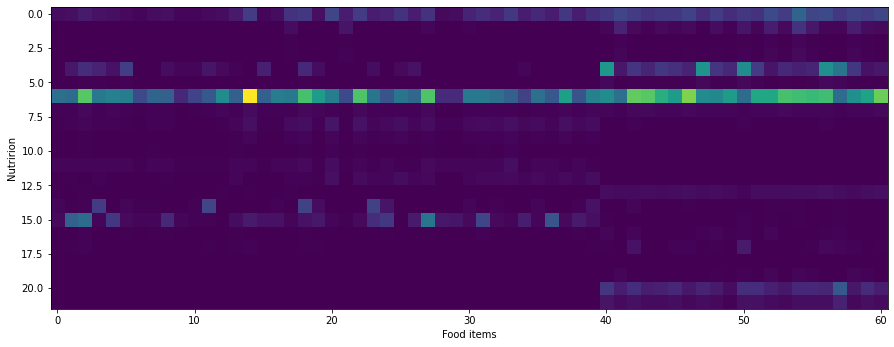

2 random dimensions distribution


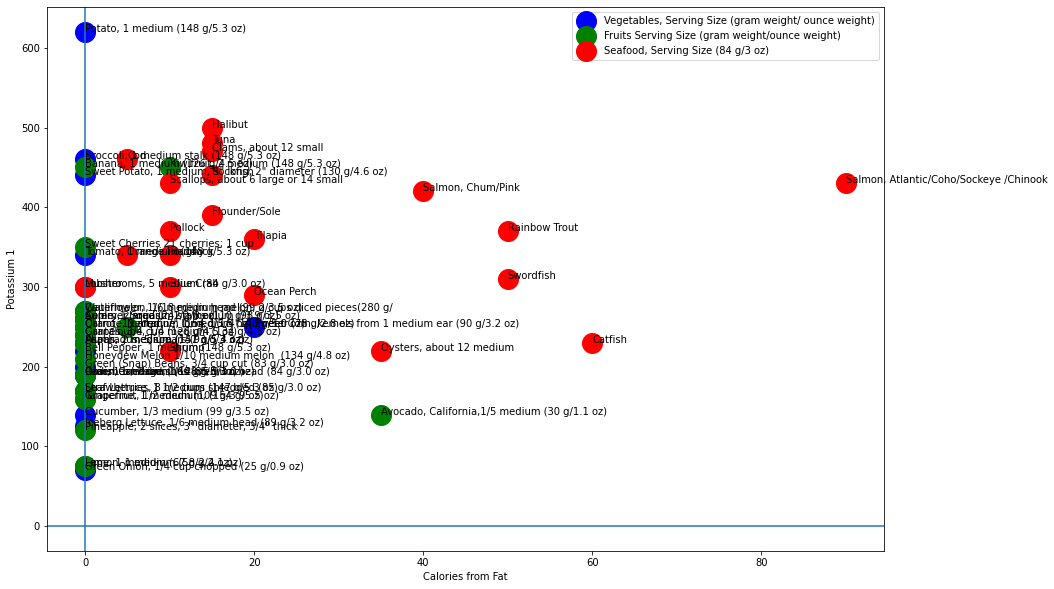

In [ ]:
A = dataset.to_numpy()[1:,1:-1].astype('float64')
print("Raw matrix values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

2 random dimensions distribution centered


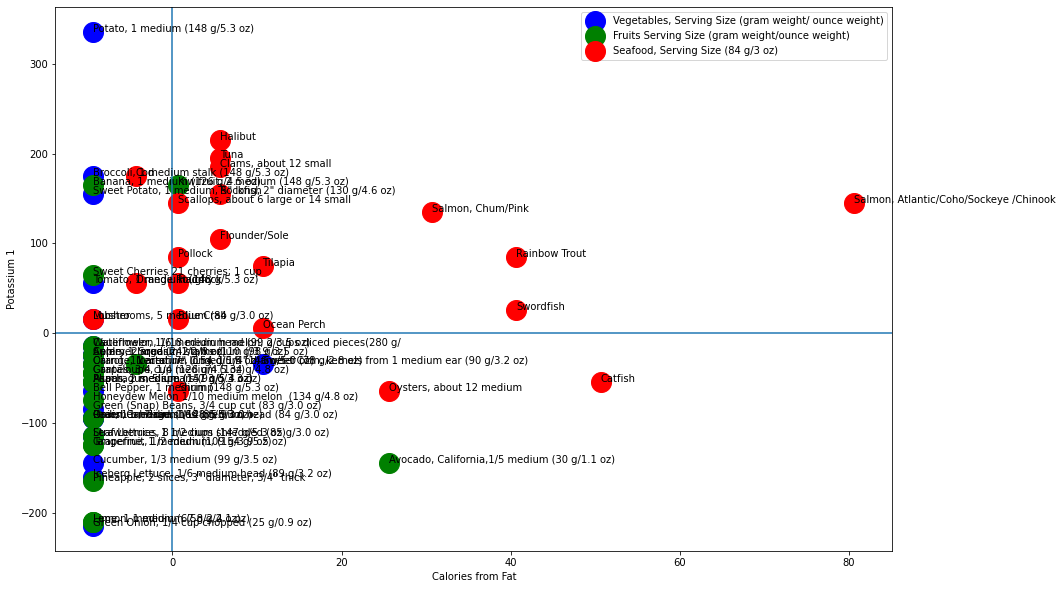

In [ ]:
def centered(A):
    C = A.copy()
    centers = np.mean(A, axis=0)
    C = A.T - centers.reshape((22,1))
    return C.T

Ac = centered(A)

assert np.allclose(np.mean(Ac, axis=0), np.zeros((22, 1))), "After centering, average value of the column should be equal to 0"

print("2 random dimensions distribution centered")
show_points_2d(Ac.T[1], Ac.T[6], dimensions[1], dimensions[6])

##. BY NOW: ANY IDEAS how to compute SVD decomposition?

$$
\overline{X} = U Σ V^{\top}
$$

Hint: What are egigen decomposition of matrices $\overline{X}^{\top}\overline{X}$ and $\overline{X}\overline{X}^{\top}$



#While you thinking I am doing qr dalgoritm again

1) Set $A_0 = A$


2) Compute QR factorization $A_k = Q_k R_k$




3) Set $A_{k+1} = R_k Q_k $

In [ ]:
def QR_algorithm(X, iters=1000):
    A = X.copy()
    PQ = np.eye(A.shape[0])
    # plt.imshow(A)
    # plt.show()
    for i in range(iters):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        PQ = PQ @ Q

    return np.diag(A), PQ

And here SVD goes

In [ ]:
def SVD(X):
  A  = X.copy()
  ATA = A.T @ A
  AAT = A @ A.T
  sigma_2, V = QR_algorithm(ATA)
  _ , U = QR_algorithm(AAT)

  sigma = sigma_2**(0.5)
  sigma = sigma[~np.isclose(sigma, 0)]
  V = V[:sigma.shape[0], :]
  U = U[:,:sigma.shape[0] ]
  return U, sigma, V

In [ ]:
U, sigma, V = SVD(Ac)

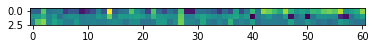

2 first dimensions


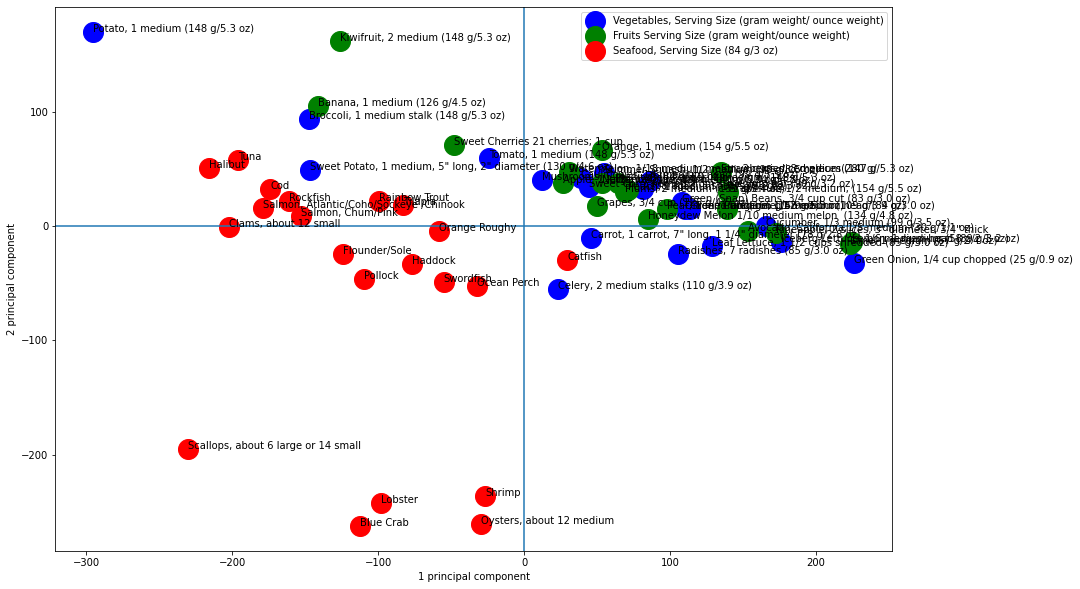

3 first dimensions


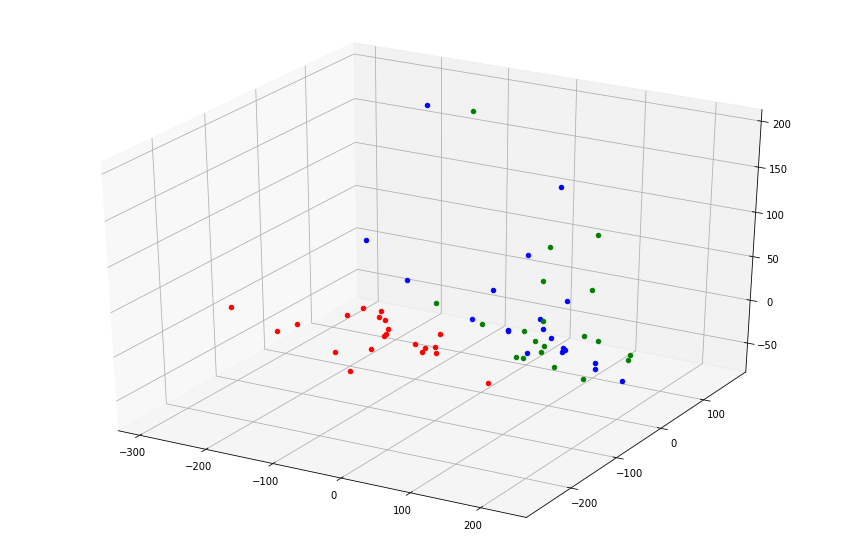

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
Ak =   U[:, :k] @ np.diag(sigma)[:k,:k]

plt.imshow(Ak.T)
plt.show()

print("2 first dimensions")
show_points_2d(-Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(-Ak.T[0], Ak.T[1], Ak.T[2])

## RECOMMENDER


In [ ]:
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def cosine(vec1, vec2):

  return vec1@vec2 /(np.linalg.norm(vec1)*np.linalg.norm(vec2))


In [ ]:
def find_k_closest(query, Ak, k=5):
    cosines =  np.array([cosine(query, Ak[i, :]) for i in range(Ak.shape[0])])
    sort_indexes = np.argsort(-cosines)
    sort_cosines = np.abs(np.sort(-cosines))
    return sort_indexes[1: k+1], sort_cosines[1: k+1]


recommend_to = 0
inds, cos = find_k_closest(Ak[recommend_to,:], Ak)


print("For:", names[recommend_to])
for k,  p in zip(inds, cos):
    print("\t", names[k], "sim=", p)

For: Asparagus, 5 spears (93 g/3.3 oz)
	 Peach, 1 medium (147 g/5.3 oz) sim= 0.9900306633803704
	 Green (Snap) Beans, 3/4 cup cut (83 g/3.0 oz) sim= 0.9830960808594849
	 Plums, 2 medium (151 g/5.4 oz) sim= 0.9740244451806317
	 Onion, 1 medium (148 g/5.3 oz) sim= 0.9705752498785494
	 Pear, 1 medium (166 g/5.9 oz) sim= 0.9570755360424748
